In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.spatial.distance import cdist

In [2]:
K = 3

In [3]:
iris = pd.read_csv("../input/iris-flower-dataset/IRIS.csv")

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data_features = pd.DataFrame(data=iris, columns= ['sepal_length','sepal_width','petal_length','petal_width'])

In [6]:
data_features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
data_target = iris['species']

In [8]:
data_target.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [9]:
labels = []
for i in range(len(data_target)):
    if data_target[i] =='Iris-setosa':
        labels.append(0)
    elif data_target[i] =='Iris-versicolor':
        labels.append(1)
    elif data_target[i] =='Iris-virginica':
        labels.append(2)
labels_int = np.array(labels, dtype = int)
labels_int

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

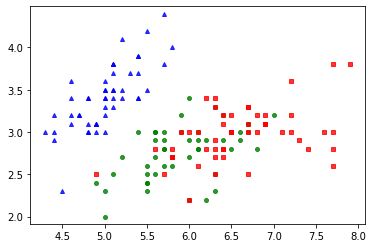

In [10]:
def kmeans_display(X, labels):
    X0 = X[labels == 0, :]
    X1 = X[labels == 1, :]
    X2 = X[labels == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(data_features.to_numpy(),labels_int)

Hàm khởi tạo các centers ban đầu****

In [11]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

Hàm gán nhán mới cho các điểm khi biết các centers.

In [12]:
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)
    

Hàm cập nhật các centers mới dữa trên dữ liệu vừa được gán nhãn.

In [13]:
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

Hàm kiểm tra điều kiện dừng của thuật toán.

In [14]:
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [15]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

In [16]:
X = data_features.to_numpy()

Centers found by our algorithm:
[[4.74166667 2.95416667 1.75416667 0.32916667]
 [5.21666667 3.64       1.47333333 0.28      ]
 [6.31458333 2.89583333 4.97395833 1.703125  ]]


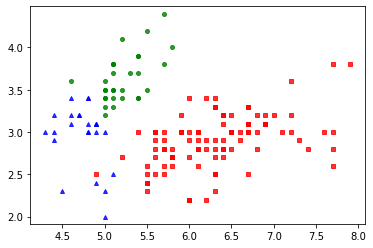

In [17]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

Centers found by scikit-learn:
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


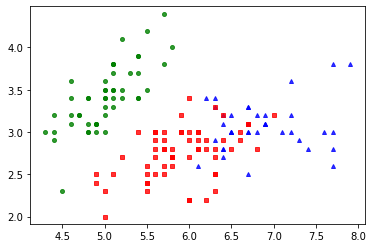

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)